# Fire up GraphLap Create (Pandas)

In [1]:
#import graphlab (Pandas)
import pandas as pd

# Load some house sales data

In [2]:
sales = pd.read_csv('kc_house_data.csv')

In [3]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Exploring the data for housing sales

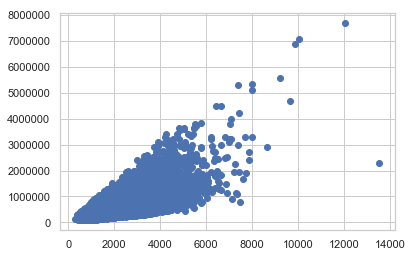

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(sales['sqft_living'], sales['price'])
plt.show()

# Create a simple regression model of sqft_living to price

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split 

np.random.seed(7)
# Split the data to training and testing sets
msk = np.random.rand(len(sales)) < 0.8
train_data = sales[msk]
test_data = sales[~msk]

print(f'train_data: {len(train_data)}, test_data: {len(test_data)}')

train_data: 17262, test_data: 4351


# Build the regression model

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
sqft_regr_model = linear_model.LinearRegression()

features_train = train_data['sqft_living'].values.reshape(-1, 1)
target_train =  train_data['price'].values.reshape(-1, 1)

features_test = test_data['sqft_living'].values.reshape(-1, 1)
target_test =  test_data['price'].values.reshape(-1, 1)

# Train the model using the training sets
sqft_regr_model.fit(features_train, target_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate the model

In [13]:
print(test_data.price.mean())

540612.492760285


In [18]:
target_pred = sqft_regr_model.predict(features_test)

# The score
print(f'Score: {sqft_regr_model.score(features_train, target_train)}') 
# The coefficients
print('Coefficients: \n', sqft_regr_model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))
# The intercept
print(f'Intercept: {sqft_regr_model.intercept_}')

Score: 0.4930030318772769
Coefficients: 
 [[280.39420414]]
Mean squared error: 66830523153.54
Variance score: 0.49
Intercept: [-43500.47338809]


# Let's show what our predictions look like

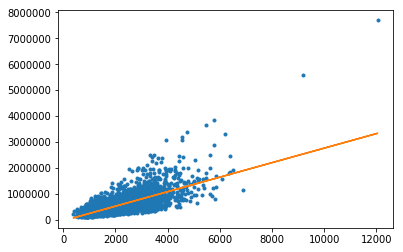

In [17]:
# Plot outputs
plt.plot(features_test, target_test, '.',
         features_test, target_pred, '-')

plt.show()

# Explore other features in the data

In [21]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'zipcode']

In [22]:
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
5,4,4.50,5420,101930,1.0,98053
6,3,2.25,1715,6819,2.0,98003
7,3,1.50,1060,9711,1.0,98198
8,3,1.00,1780,7470,1.0,98146
9,3,2.50,1890,6560,2.0,98038


<IPython.core.display.Javascript object>


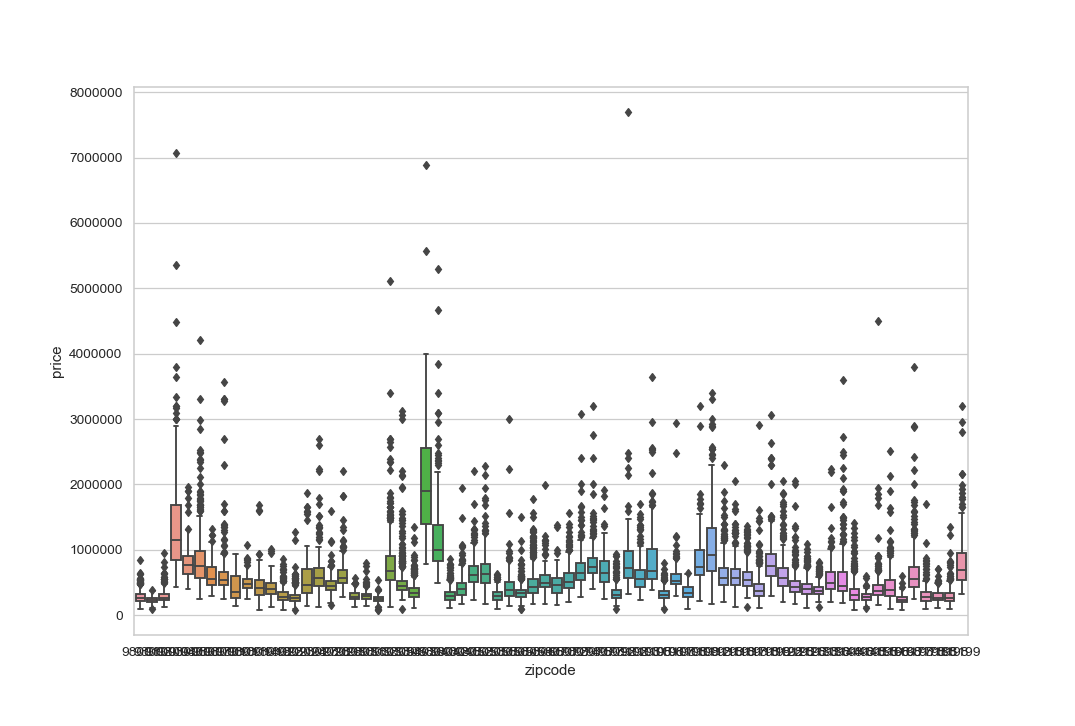

In [34]:
%matplotlib nbagg

import seaborn as sns
sns.set(style="whitegrid")

sns.boxplot(x=sales['zipcode'], y=sales['price'])

# Build a regession model with more features

In [43]:
# Create linear regression object
my_features_model = linear_model.LinearRegression()

features_train = train_data[my_features]
target_train =  train_data['price'].values.reshape(-1, 1)

features_test = test_data[my_features]
target_test =  test_data['price'].values.reshape(-1, 1)

# Train the model using the training sets
my_features_model.fit(features_train, target_train)

target_pred = my_features_model.predict(features_test)

# The score
print(f'Score: {my_features_model.score(features_train, target_train)}') 
# The coefficients
print('Coefficients: \n', my_features_model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))
# The intercept
print(f'Intercept: {my_features_model.intercept_}')

Score: 0.5147583605640456
Coefficients: 
 [[-5.51370907e+04  9.46240122e+03  3.16013120e+02 -2.91072005e-01
   4.82194718e+02  5.96634853e+02]]
Mean squared error: 63679708325.80
Variance score: 0.52
Intercept: [-58464831.21867729]


# Apply learned model to predict prices of 3 houses

In [46]:
house1 = sales[sales['id'] ==5309101200]
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [47]:
print(house1['price'])

1054    620000.0
Name: price, dtype: float64


In [50]:
print(sqft_regr_model.predict(house1['sqft_living'].values.reshape(-1, 1)))

[[629445.61655689]]


In [51]:
print(my_features_model.predict(house1[my_features]))

[[633530.25314559]]


# Predict for a second, fncier house

In [52]:
house2 = sales[sales['id'] == 1925069082]
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [53]:
print(house2['price'])

1361    2200000.0
Name: price, dtype: float64


In [56]:
print(sqft_regr_model.predict(house2['sqft_living'].values.reshape(-1, 1)))

[[1257528.63383888]]


In [57]:
print(my_features_model.predict(house2[my_features]))

[[1261596.21258603]]


# Last house, super fancy

In [60]:
bill_gates_house = {
    'bedrooms':[8],
    'bathrooms':[25],
    'sqft_living':[50000],
    'sqft_lot':[225000],
    'floors':[4],
    'waterfront':[1],
    'view':[4],
    'grade':[10],
    'sqft_above':[37500],
    'sqft_basement':[12500],
    'yr_built':[1994],
    'yr_renovated':[2010],
    'zipcode':['98039'],
    'lat':[47.627606],
    'long':[-122.242054],
    'sqft_living15':[5000],
    'sqft_lot15':[40000]
}

bill_gates_house = pd.DataFrame(bill_gates_house)

In [61]:
print(sqft_regr_model.predict(bill_gates_house['sqft_living'].values.reshape(-1, 1)))

[[13976209.73379906]]


In [63]:
print(my_features_model.predict(bill_gates_house[my_features].values.reshape(1, -1)))

[[15561210.02214295]]
